# Assessment2019.

## Describe: 

## Load the Boston housing dataset.

The data was collected in 1978 and  originates from the UCI Machine Learning Repository. Each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [26]:
#import and print out dataset and credits.
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())

print(boston.data.shape)

print(boston.feature_names)

print(boston.DESCR)





dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

# Descriptive Statistics and Plots.
The data can be broken down into sections:
1. Displaying the dataset in table format.
2. Removing all null values.
3. Finding the mean, SD, min and max numbers in each column and Displaying stats using plots.
4. Finding the mean, SD, Max and min for the house prices within the dataset and displaying using plots.

### Displaying the data in table format.
After pulling in the datasetit needs to be displayed it in a readable style. There are many lines within this code which would take up much space, for the purpose of this project the author will call the first 5 at the top and bottom of the table. Utilising pandas, the method pd.DataFrame()  pass boston.data, the first and last five data lines are displayed using head() and tail()functions, the numbers of lines len() are also displayed, so the user is aware of the expance of the data.

In [27]:
#to get the line lengths
print("The number of lines in the dataset are:" )
len(boston)

The number of lines in the dataset are:


5

In [28]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
#import supplementary visualization code visuals.py
#import visuals_md as vs
import matplotlib.pyplot as plt

#Pretty display for notebooks
%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.datasets import load_boston
boston = load_boston()

#complie data to give correct headings and place on readable table.
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
#complie data to give correct headings and place on readable table.
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.tail()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


### Removing all null values.

Many datasets will have some amount of data missing, this is rectified by utilising Pandas to clean the data by elimiating any missing data. Pandas automatically sets as NaN values. These are identified by running df.isnull() , which returns a Boolean DataFrame. To get the number of NaN's per column, run df.isnull().sum(). 


In [30]:
#clean the data find the null values and display.

bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### To simplify the analysis, remove some of the columns. 
  #### If you wish to remove some columns by running the cell that contains the following code:

In [31]:
#for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
     #del bos[col]

### Finding the mean, SD, min and max numbers in each column and Displaying stats using plots.

This computes the mean, standard deviation, minimum, and maximum properties for each column. This table gives an idea of how everything is distributed. for asthetic reasons the author employed the use of { .T }to the output; this swaps the rows and columns displaying the names along the side. 

In [32]:
bos['PRICE'] = boston.target
bos.head()
bos.describe().T




,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Finding the mean, SD, Max and min for the house prices within the dataset and displaying using plots.
Displaying the minimum, maximum, mean, median, and standard deviation of median value owner occupied homes in $1000's 'MEDV', which is stored in prices.
Each calculation is stored in their respective variable.


In [151]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
#data = pd.read_csv('housing.csv')
bos = pd.DataFrame(boston.data)
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("\nStatistics for Boston housing dataset Prices:\n")
print("Minimum : ${:,.2f}".format(minimum_price)) 
print("Maximum : ${:,.2f}".format(maximum_price))
print("Mean : ${:,.2f}".format(mean_price))
print("Median:  ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))



Boston housing dataset has 489 data points with 4 variables each.

Statistics for Boston housing dataset Prices:

Minimum : $105,000.00
Maximum : $1,024,800.00
Mean : $454,342.94
Median:  $438,900.00
Standard deviation of prices: $165,340.28


Above the author has used  hstogram to visualise the median value of all the homes with other features.
The distribution of the target variable using the histogram plot function from the matplotlib library.
We can see from the plot that the values of MEDV are distributed normally with few outliers. 

# Infer:

Create scatter plots to represent the data in pictorial form.

(354, 13)
(152, 13)
(354,)
(152,)


Text(0.5, 1.0, 'Prices vs Predicted prices:')

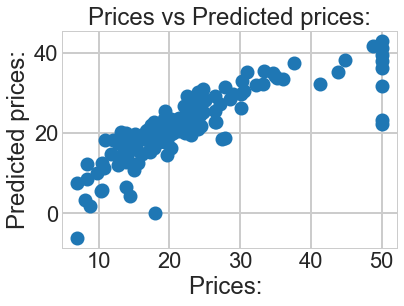

In [42]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.model_selection

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: ")
plt.ylabel("Predicted prices:")
plt.title("Prices vs Predicted prices:")


## Using three features from the Boston housing dataset to create scatter plot disgrams: 
* 'RM': is the average number of rooms among homes in the neighborhood. Higher the RM, presumably higher MEDV.This is because more rooms would imply more space, thereby costing more
* 'LSTAT': is the percentage of homeowners in the neighborhood considered "lower class" (working poor).Higher LSTAT,there is a lower MEDV.The area dominated by "lower class" citizens  may be deemed  unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would have lower home demand, hence lower prices.
* 'PTRATIO': is the ratio of students to teachers in primary and secondary schools in the neighborhood.higher LSTAT, one would expect to observe a lower MEDV.This is because there would be a higher student to teacher ratio resulting in less attention dedicated to each student that may impair their performance in school. Prices of houses around public schools where there is a high student to teacher ratio are generally lower than those with the opposite. Therefore expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.


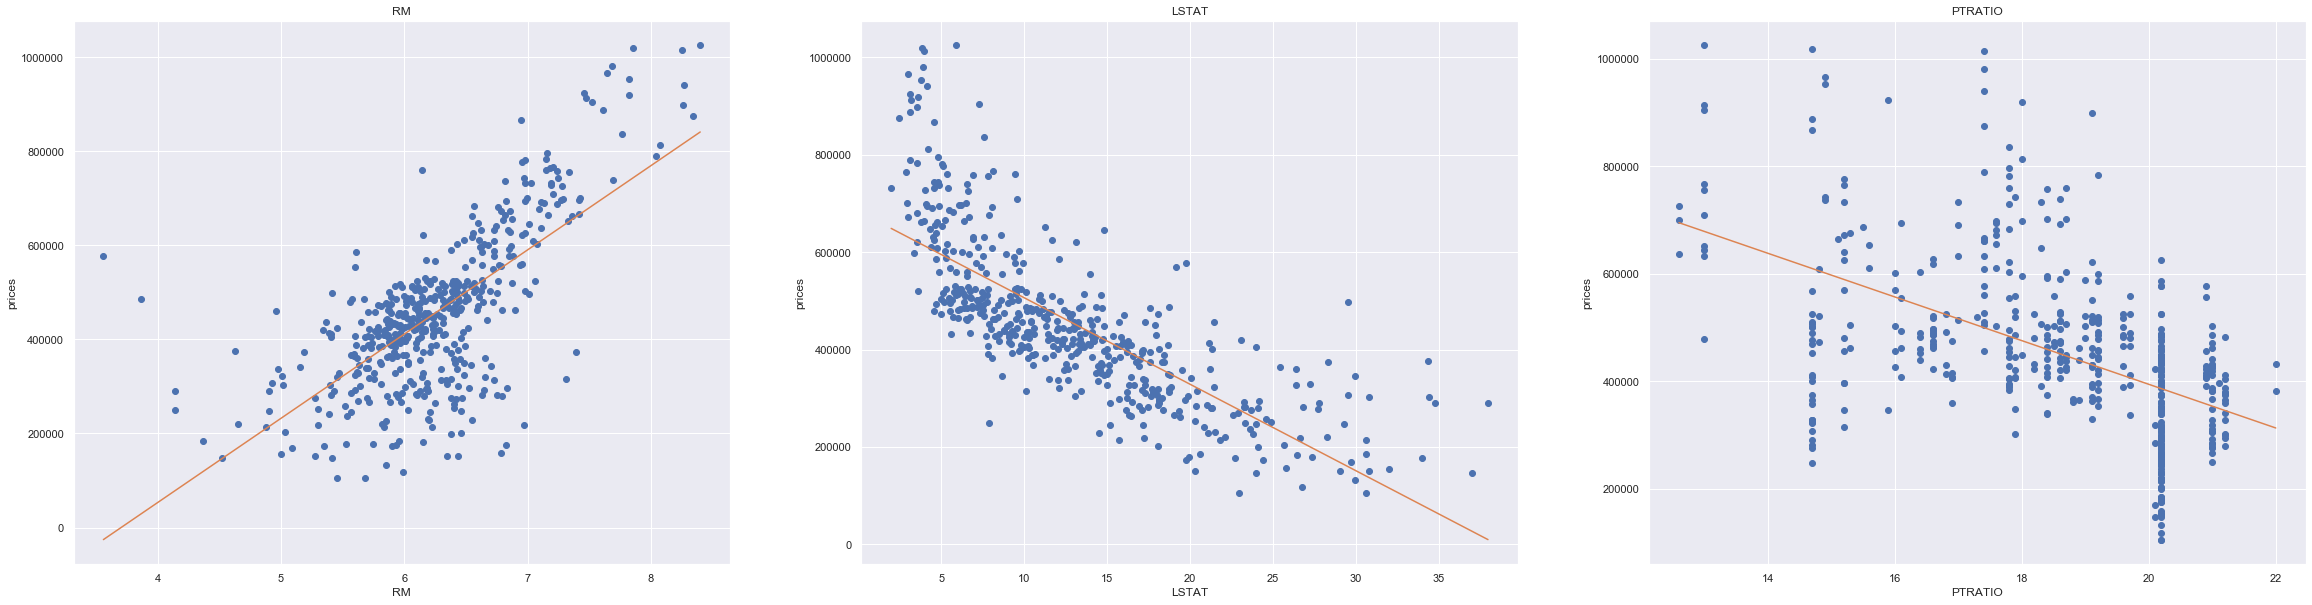

In [98]:
# Using pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

plt.figure(figsize=(40, 10))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

# -----------------------------------------------------------------------------------------------------

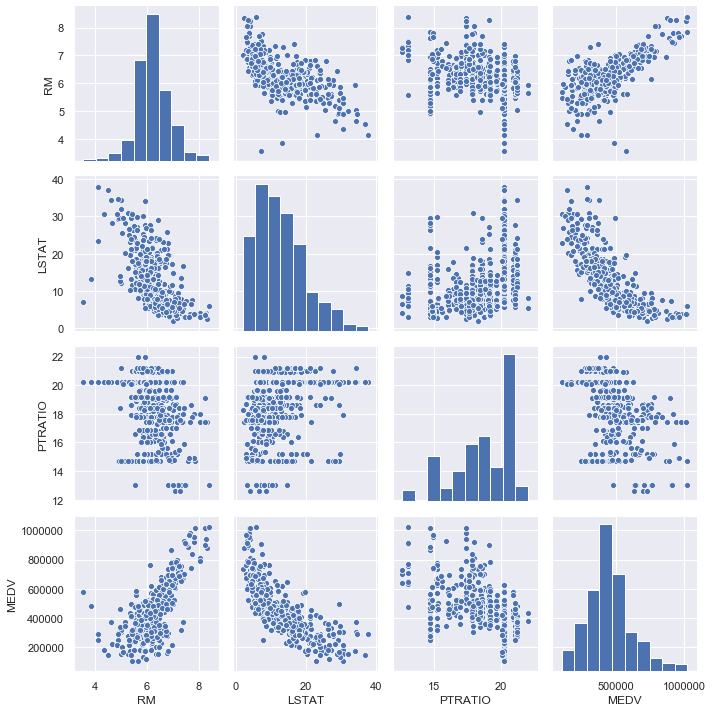

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(data, size=2.5)
plt.tight_layout()

# Analyse whether there is a significant difference in median house prices between those on the charles river and those not.

Finding correlation between attributes is a useful way to check for patterns in the dataset. Pandas offers three different ways to find correlation between attributes (columns). The output of each of these correlation functions fall within the range of -1 to 1.

1 is Positively correlated
-1 is Negatively correlated.
0 is Not correlated at all.
We will use df.corr() function to compute the correlation between attributes and sns.heatmap() function to visualize the correlation matrix.


In [125]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.distplot(bos['MEDV'], bins=30)
#plt.show()

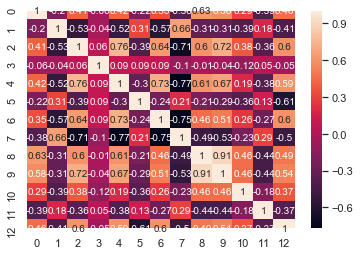

In [149]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)



 Observations: To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74). 
 An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together if training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.
 
The question was posed, 'Was there a significantdifference in house prices between house prices along the charle River and those not'? 
In the authors opinion, there is a sigificant difference in house prices, house prices are higher in areas with lower crime and lower pupil-teacher ratios. House prices also tend to be higher closer to the Charles River, and houses with more rooms are pricier.. Using the heamap and survaying the various lines along the grid, the nearest corrolation with 'CHAS' is 'PRICE' AND 'MEDV' BOTH AT (0.2), while it is on the positive and indicate a correlation, it doesn't indicate a strong correlation with the variable. On the oposite side are 'LSTAT','PTRATIO' AND 'DIS', (-0.1)the latter indicate a lower 'ststus' of population, where house prices are presumable less expensive due to the populations ecconomic circumstance, higher teacher pupil ratio and distance from an employment center.


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
cols = [ MEDV, PTRATIO] 
boston[cols].head()
boston[cols].corr()


ax =sns.heatmap(bos[cols].corr(),cmap=sns.cubehelix_palette(100, light=0.10, dark=0.95))
ax.xaxis.tick_top() # move labels to the top

for tick in ax.get_xticklabels():
     tick.set_rotation(45)
for tick in ax.get_yticklabels():
     tick.set_rotation(360)

NameError: name 'MEDV' is not defined

In [127]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

KeyError: 'PRICE'

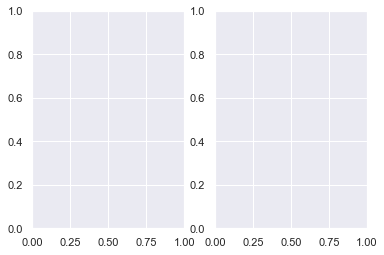

In [128]:
fig, ax = plt.subplots(1, 2)
sns.regplot('PRICE', 'CHAS', bos, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'CHAS', bos, ax=ax[1],
scatter_kws={'alpha': 0.4}) 

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0] = sns.residplot('RM', 'CHAS', bos, ax=ax[0],
scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('MDEV residuals ')
ax[1] = sns.residplot('LSTAT', 'CHAS', bos, ax=ax[1],
scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')

In [ ]:
# Import 'r2_score'
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    # Calculates and returns the performance score between 
    #true and predicted values based on the metric chosen.
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))



R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data, r^2 = 0.92 is strong.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()


# Predict: 
Kerals creation of a neural notebook, predicting the median house prices based on the other variables.
1. Exploring and Processing the Data
2. Building and Training our Neural Network
3. Visualizing Loss and Accuracy
4. Adding Regularization to our Neural Network

### Exploring and Processing the Data

Before we code any ML algorithm, the first thing we need to do is to put our data in a format that the algorithm will want. In particular, we need to:

* Read in the CSV (comma separated values) file and convert them to arrays. Arrays are a data format that our algorithm can process.
* Split our dataset into the input features (which we call x) and the label (which we call y).
* Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
* Split our dataset into the training set, the validation set and the test set.

### Import the data.

In [156]:
# library needed
import pandas as pd

#df = pd.read_csv('house.csv')
import sklearn 
from sklearn import datasets
boston=datasets.load_boston()
type (boston)

df.isnull().sum()

df # ptints out the dataset in a nice format.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# convert it into arrays for our machine to process:

In [158]:
dataset = df.values

dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

The dataset is split into input features (X), and the feature to predict (Y). 
To do that split, we assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y.

The next step in our processing is to make sure that the scale of the input features are similar.
One way to scale the data is to use an existing package from scikit-learn.

In [171]:
X = dataset[:,0:20]

Y = dataset[:,4]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


X_scale #scaled dataset is stored in the array ‘X_scale’. to see what ‘X_scale’ looks like

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

Split the dataset into a training set, a validation set and a test set.

Credit code from scikit-learn: called ‘train_test_split’, which splits the dataset into a training set and a test set. 

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.5) # split your dataset


X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(253, 13) (126, 13) (127, 13) (253,) (126,) (127,)


The training set has 354 data points while the validation and test set has 126 data points each. The X variables have 13 input features, while the Y variables only has one feature to predict.

## Setting up the Architecture

The first thing to do is to set up the architecture. 

Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation

Then describe this architecture to Keras using the Sequential model. it is important to describe the layers in sequence.

First, let’s import the necessary code from Keras:

In [161]:
#import the necessary code from Keras:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Specify using Keras sequential model like this:

The model will be stored as a variable ‘model’, and be described layer by layer  between square brackets.

The first layer is a dense layer with 32 neurons, ReLU activation and the input shape is 10 because there are 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.

Dense(32, activation='relu'),

The second layer is also a dense layer with 32 neurons, ReLU activation. Keras infers from the output of our first layer so no input needed.

The third layer is a dense layer with 1 neuron, sigmoid activation.


In [176]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),# 1st layer
    Dense(32, activation='relu'), # 2nd layer
    Dense(1, activation='sigmoid'), #3rd layer
])

Configure the model by telling it:

* which algorithm you want to use to do the optimization
* what loss function to use
* what other metrics you want to track apart from the loss function


‘sgd’ refers to stochastic gradient descent 

The loss function for outputs that take the values 1 or 0 is called binary cross entropy.

Track accuracy on top of the loss function. 

Training on the data is pretty straightforward and requires the data to fit the parameters of the data. We have to specify what data we are training referred to as  X_train and Y_train. The size of our mini-batch and duration of training time (epochs) is specified. Lastly, we specify what our validation data is at each point. 

In [177]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])





In [178]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 253 samples, validate on 126 samples
Epoch 1/100
253/253 [==============================] - 1s 3ms/step - loss: 0.6975 - accuracy: 0.0000e+00 - val_loss: 0.6985 - val_accuracy: 0.0000e+00
Epoch 2/100
253/253 [==============================] - 0s 118us/step - loss: 0.6960 - accuracy: 0.0000e+00 - val_loss: 0.6970 - val_accuracy: 0.0000e+00
Epoch 3/100
253/253 [==============================] - 0s 126us/step - loss: 0.6946 - accuracy: 0.0000e+00 - val_loss: 0.6956 - val_accuracy: 0.0000e+00
Epoch 4/100
253/253 [==============================] - 0s 122us/step - loss: 0.6934 - accuracy: 0.0000e+00 - val_loss: 0.6944 - val_accuracy: 0.0000e+00
Epoch 5/100
253/253 [==============================] - 0s 126us/step - loss: 0.6924 - accuracy: 0.0000e+00 - val_loss: 0.6934 - val_accuracy: 0.0000e+00
Epoch 6/100
253/253 [==============================] - 0s 134us/step - loss: 0.6915 - accuracy: 0.0000e+00 - val_loss: 0.6924 - val_accuracy: 0.0000e+00
Epoch 7/100
253/253 [=================

Epoch 54/100
253/253 [==============================] - 0s 119us/step - loss: 0.6812 - accuracy: 0.0000e+00 - val_loss: 0.6803 - val_accuracy: 0.0000e+00
Epoch 55/100
253/253 [==============================] - 0s 126us/step - loss: 0.6811 - accuracy: 0.0000e+00 - val_loss: 0.6801 - val_accuracy: 0.0000e+00
Epoch 56/100
253/253 [==============================] - 0s 126us/step - loss: 0.6810 - accuracy: 0.0000e+00 - val_loss: 0.6800 - val_accuracy: 0.0000e+00
Epoch 57/100
253/253 [==============================] - 0s 119us/step - loss: 0.6809 - accuracy: 0.0000e+00 - val_loss: 0.6799 - val_accuracy: 0.0000e+00
Epoch 58/100
253/253 [==============================] - 0s 115us/step - loss: 0.6808 - accuracy: 0.0000e+00 - val_loss: 0.6797 - val_accuracy: 0.0000e+00
Epoch 59/100
253/253 [==============================] - 0s 111us/step - loss: 0.6807 - accuracy: 0.0000e+00 - val_loss: 0.6796 - val_accuracy: 0.0000e+00
Epoch 60/100
253/253 [==============================] - 0s 119us/step - loss

In [179]:
model.evaluate(X_test, Y_test)[1]

127/127 [==============================] - 0s 71us/step


0.0

Due to the randomness in how the dataset splits the numbers and graph will differ slightly each time the notebook is ran. Test accuracy printed in the output!

### Plot and visualise.

The first two lines plot the loss and the val_loss. The third line specifies the title of this graph, “Model Loss”. The fourth and fifth line names the y and x axis. The sixth line is the legend and location for the graph.  And the seventh line is display.

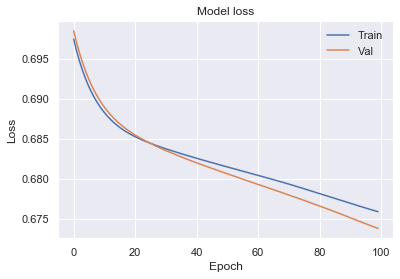

In [180]:
# visualize the training loss and the validation loss
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Training accuracy and valid accuracy.

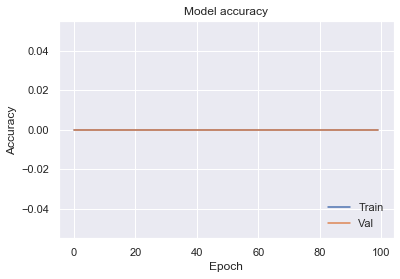

In [181]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [183]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(13,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],)
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 253 samples, validate on 126 samples
Epoch 1/100
253/253 [==============================] - 2s 6ms/step - loss: 0.6771 - accuracy: 0.0000e+00 - val_loss: 0.6617 - val_accuracy: 0.0000e+00
Epoch 2/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.0000e+00 - val_loss: 0.6566 - val_accuracy: 0.0000e+00
Epoch 3/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.0000e+00 - val_loss: 0.6558 - val_accuracy: 0.0000e+00
Epoch 4/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.0000e+00 - val_loss: 0.6556 - val_accuracy: 0.0000e+00
Epoch 5/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.0000e+00 - val_loss: 0.6552 - val_accuracy: 0.0000e+00
Epoch 6/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.0000e+00 - val_loss: 0.6550 - val_accuracy: 0.0000e+00
Epoch 7/100
253/253 [===========================

253/253 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.0000e+00 - val_loss: 0.6545 - val_accuracy: 0.0000e+00
Epoch 55/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.0000e+00 - val_loss: 0.6545 - val_accuracy: 0.0000e+00
Epoch 56/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.0000e+00 - val_loss: 0.6545 - val_accuracy: 0.0000e+00
Epoch 57/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.0000e+00 - val_loss: 0.6545 - val_accuracy: 0.0000e+00
Epoch 58/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.0000e+00 - val_loss: 0.6545 - val_accuracy: 0.0000e+00
Epoch 59/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.0000e+00 - val_loss: 0.6545 - val_accuracy: 0.0000e+00
Epoch 60/100
253/253 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.0000

In [184]:
model.evaluate(X_test, Y_test)[0]

127/127 [==============================] - 0s 71us/step


0.6762532727924857

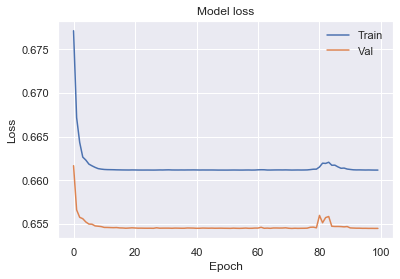

In [185]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

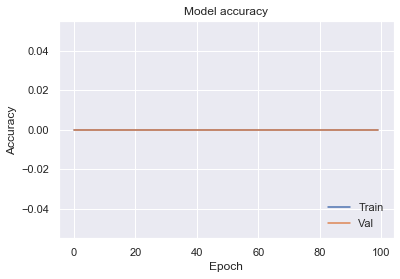

In [186]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [187]:
from keras.layers import Dropout
from keras import regularizers #tells Keras to include the squared values of those parameters in loss function, 
#and weight them by 0.01 in the loss function.

In [190]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(13,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), #tells Keras to include the squared values of those parameters in loss function, 
                                                                                #and weight them by 0.01 in the loss function.
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [191]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],)
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 253 samples, validate on 126 samples
Epoch 1/100
253/253 [==============================] - 3s 10ms/step - loss: 26.0931 - accuracy: 0.0000e+00 - val_loss: 20.1464 - val_accuracy: 0.0000e+00
Epoch 2/100
253/253 [==============================] - 1s 2ms/step - loss: 16.4571 - accuracy: 0.0000e+00 - val_loss: 12.1931 - val_accuracy: 0.0000e+00
Epoch 3/100
253/253 [==============================] - 1s 2ms/step - loss: 9.7664 - accuracy: 0.0000e+00 - val_loss: 7.0432 - val_accuracy: 0.0000e+00
Epoch 4/100
253/253 [==============================] - 1s 2ms/step - loss: 5.5730 - accuracy: 0.0000e+00 - val_loss: 3.9635 - val_accuracy: 0.0000e+00
Epoch 5/100
253/253 [==============================] - 1s 2ms/step - loss: 3.1392 - accuracy: 0.0000e+00 - val_loss: 2.2585 - val_accuracy: 0.0000e+00
Epoch 6/100
253/253 [==============================] - 1s 2ms/step - loss: 1.8305 - accuracy: 0.0000e+00 - val_loss: 1.3844 - val_accuracy: 0.0000e+00
Epoch 7/100
253/253 [======================

253/253 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.0000e+00 - val_loss: 0.6866 - val_accuracy: 0.0000e+00
Epoch 55/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.0000e+00 - val_loss: 0.6867 - val_accuracy: 0.0000e+00
Epoch 56/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.0000e+00 - val_loss: 0.6866 - val_accuracy: 0.0000e+00
Epoch 57/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.0000e+00 - val_loss: 0.6867 - val_accuracy: 0.0000e+00
Epoch 58/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.0000e+00 - val_loss: 0.6866 - val_accuracy: 0.0000e+00
Epoch 59/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.0000e+00 - val_loss: 0.6866 - val_accuracy: 0.0000e+00
Epoch 60/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.0000

In [192]:
model.evaluate(X_test, Y_test)[1]

127/127 [==============================] - 0s 118us/step


0.0

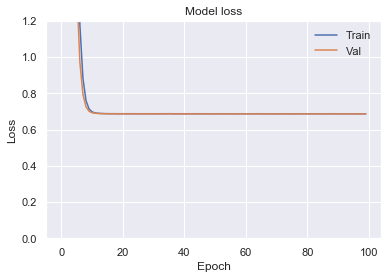

In [193]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

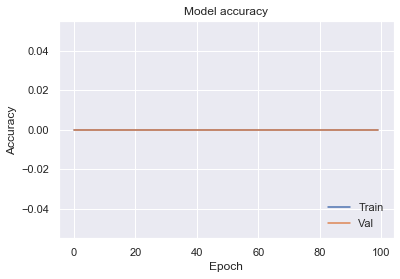

In [194]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()